# Sonata Lightning Tools: Query Similarity Search

### Takes the processed similarity data and enables the search 

In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os
%run lightning_helper.ipynb

## Document metadata with Queries

In [2]:
# Load the data from Excel file
excel_file_path = get_full_file_path('output', 'query_data_lookup.csv')
# excel_file_path = 'test_data.csv'
df = pd.read_csv(excel_file_path)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,DocId,DpId,DpName,DsId,QueryPlan,TableCount,ColumnCount,Complexity,TableList,ColumnList,Query_Statement
0,6814,DP5,Metrics,6816,"{""queryplan"":{""@custom"":""false"",""@editable"":""t...",2,13,False,Properties;Properties Level1,int(Properties.si_id);Properties.si_name;Prope...,"{""@index"": ""0"", ""$"": ""SELECT int(Properties.si..."
1,6818,DP3,instance,6816,"{""queryplan"":{""@custom"":""false"",""@editable"":""t...",2,9,False,Properties;Properties Level1,int(Properties.si_id);Properties.si_name;int(P...,"{""@index"": ""0"", ""$"": ""SELECT int(Properties.si..."
2,6820,DP3,instance,6816,"{""queryplan"":{""@custom"":""false"",""@editable"":""t...",2,19,False,Properties;Properties Level1,int(Properties.si_id);int(Properties.si_parent...,"{""@index"": ""0"", ""$"": ""SELECT int(Properties.si..."
3,6695,DP0,Query 1,5646,"{""queryplan"":{""@custom"":""false"",""@editable"":""t...",1,4,False,rio;,Country;Sport;Name;Medal;,"{""@index"": ""0"", ""$"": ""SELECT rio.Country, rio...."
4,5903,DP0,Query 1,5636,"{""queryplan"":{""@custom"":""false"",""@editable"":""t...",3,8,True,Article_Color_Lookup;Article_Lookup_Criteria;S...,Family_name;Category;Article_id;Article_label;...,"{""queryplan"": {""@custom"": ""false"", ""@editable""..."


## Read all the query statements & clense queries

In [3]:
sim_file_path = get_full_file_path('output', 'query_data_similarity.csv')

# excel_file_path = 'test_data.csv'
df1 = pd.read_csv(sim_file_path)
df1.describe()
cosine_sim = df1.to_numpy()

## Similarity heatmap for all the reports based on Query statements

In [4]:
print(cosine_sim)

[[0.88492108 1.         0.92041095 0.07265861 0.02211249 0.82639387
  0.80327115 0.90166963 0.02211249 0.0857761 ]
 [0.87751303 0.92041095 1.         0.03843795 0.01169798 0.79629199
  0.83856308 0.80494154 0.01169798 0.04537738]
 [0.04793059 0.07265861 0.03843795 1.         0.030403   0.12309149
  0.05264484 0.0805823  0.030403   0.09965563]
 [0.01923549 0.02211249 0.01169798 0.030403   1.         0.04116586
  0.01344471 0.03065492 1.         0.17945919]
 [0.77877994 0.82639387 0.79629199 0.12309149 0.04116586 1.
  0.76465553 0.84559432 0.04116586 0.0934161 ]
 [0.73680309 0.80327115 0.83856308 0.05264484 0.01344471 0.76465553
  1.         0.69042487 0.01344471 0.0423744 ]
 [0.89220451 0.90166963 0.80494154 0.0805823  0.03065492 0.84559432
  0.69042487 1.         0.03065492 0.10107594]
 [0.01923549 0.02211249 0.01169798 0.030403   1.         0.04116586
  0.01344471 0.03065492 1.         0.17945919]
 [0.06062549 0.0857761  0.04537738 0.09965563 0.17945919 0.0934161
  0.0423744  0.101075

In [5]:
range(len(cosine_sim))

range(0, 9)

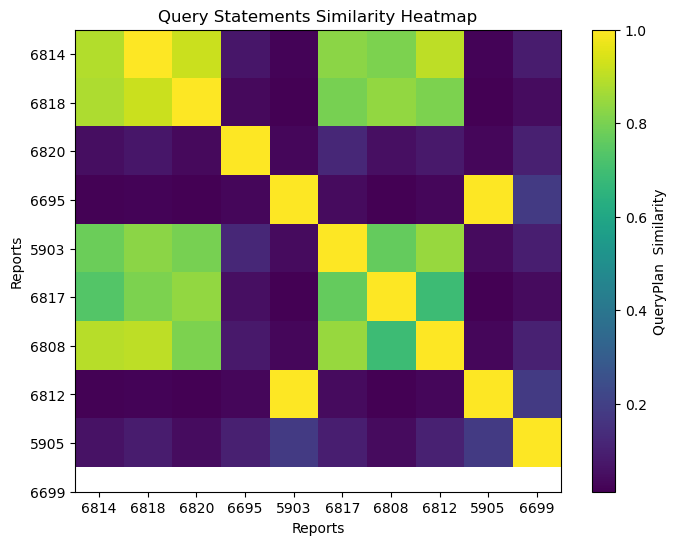

In [6]:
# Plotting the heatmap
plt.figure(figsize=(8, 6))
plt.imshow(cosine_sim, cmap='viridis', interpolation='nearest')
plt.colorbar(label='QueryPlan  Similarity')
plt.title('Query Statements Similarity Heatmap')
plt.xlabel('Reports')
plt.ylabel('Reports')
plt.xticks(range(len(cosine_sim)+1), df['DocId'])
plt.yticks(range(len(cosine_sim)+1),  df['DocId'])
plt.show()

In [7]:
# Index of the specific record you want to match
row_index_of_report = 4  # Replace this with the desired index

# Get matching rows from the DataFrame
matching_row = df.loc[row_index_of_report]

matching_row

DocId                                                           5903
DpId                                                             DP0
DpName                                                       Query 1
DsId                                                            5636
QueryPlan          {"queryplan":{"@custom":"false","@editable":"t...
TableCount                                                         3
ColumnCount                                                        8
Complexity                                                      True
TableList          Article_Color_Lookup;Article_Lookup_Criteria;S...
ColumnList         Family_name;Category;Article_id;Article_label;...
Query_Statement    {"queryplan": {"@custom": "false", "@editable"...
Name: 4, dtype: object

In [8]:
# Threshold for similarity
threshold = 0.9

# Get the row of the specific record from the similarity matrix
specific_record_similarity = cosine_sim[row_index_of_report]

# Find rows with similarity above the threshold
matching_indices = np.where(specific_record_similarity > threshold)[0]

# Print matching indices
print("Matching indices:", matching_indices)

# Get matching rows from the DataFrame
matching_rows = df.loc[matching_indices]

# Print matching rows
print("Matching rows:")
print(matching_rows)

Matching indices: [5]
Matching rows:
   DocId DpId DpName  DsId                                          QueryPlan  \
5   6817  DP0   User  6816  {"queryplan":{"@custom":"false","@editable":"t...   

   TableCount  ColumnCount  Complexity    TableList      ColumnList  \
5           1            2       False  Properties;  si_id;si_name;   

                                     Query_Statement  
5  {"@index": "0", "$": "SELECT int(Properties.si...  
